<a href="https://colab.research.google.com/github/EWHA-AI24-Project/Weather-to-Wildfire-Prediction/blob/main/notebooks/model_2/dataset_2_outlier_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('Data2_pre-2.csv')
df

,PRECIPITATION,MAX_TEMP,MIN_TEMP,AVG_WIND_SPEED,TEMP_RANGE,FIRE_START_DAY,SEASON_Fall,SEASON_Spring,SEASON_Summer,SEASON_Winter
0,0.0,26.111111,10.555556,2.101088,15.555556,False,0,0,0,1
1,0.0,21.666667,7.777778,2.498954,13.888889,False,0,0,0,1
2,0.0,21.111111,8.333333,2.400605,12.777778,False,0,0,0,1
3,0.0,24.444444,7.222222,2.101088,17.222222,False,0,0,0,1
4,0.0,23.333333,9.444444,2.297786,13.888889,False,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
14971,0.0,21.666667,8.333333,1.300886,13.333333,False,0,0,0,1
14972,0.0,22.777778,9.444444,5.999277,13.333333,False,0,0,0,1
14973,0.0,22.777778,11.666667,4.698390,11.111111,False,0,0,0,1
14974,0.0,20.000000,7.777778,2.199437,12.222222,False,0,0,0,1


In [ ]:
# === 이상치 탐지(수치형 변수에 대해) ===

df_numeric = df.iloc[:, :-5] # 범주형 변수 & 타겟값 제외

def outlier_ratio_iqr(df_numeric, column):
    Q1 = df_numeric[column].quantile(0.25)
    Q3 = df_numeric[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df_numeric[(df_numeric[column] < lower) | (df_numeric[column] > upper)]
    ratio = len(outliers) / len(df_numeric) * 100

    print(f"[{column}] 이상치 개수: {len(outliers)}개 / 전체: {len(df_numeric)}개 ({ratio:.2f}%)")
    return outliers

# 이상치 비율 탐색
outlier_ratio_iqr(df_numeric, 'PRECIPITATION')
outlier_ratio_iqr(df_numeric, 'MAX_TEMP')
outlier_ratio_iqr(df_numeric, 'MIN_TEMP')
outlier_ratio_iqr(df_numeric, 'AVG_WIND_SPEED')
outlier_ratio_iqr(df_numeric, 'TEMP_RANGE')

[PRECIPITATION] 이상치 개수: 1381개 / 전체: 14976개 (9.22%)
[MAX_TEMP] 이상치 개수: 161개 / 전체: 14976개 (1.08%)
[MIN_TEMP] 이상치 개수: 2개 / 전체: 14976개 (0.01%)
[AVG_WIND_SPEED] 이상치 개수: 479개 / 전체: 14976개 (3.20%)
[TEMP_RANGE] 이상치 개수: 573개 / 전체: 14976개 (3.83%)


,PRECIPITATION,MAX_TEMP,MIN_TEMP,AVG_WIND_SPEED,TEMP_RANGE
0,0.0,26.111111,10.555556,2.101088,15.555556
3,0.0,24.444444,7.222222,2.101088,17.222222
49,0.0,22.222222,6.666667,2.798470,15.555556
50,0.0,22.222222,6.111111,2.601773,16.111111
57,0.0,26.111111,10.000000,3.598672,16.111111
...,...,...,...,...,...
14590,0.0,26.666667,11.111111,2.700122,15.555556
14856,0.0,38.888889,22.777778,2.999638,16.111111
14947,0.0,26.666667,9.444444,2.101088,17.222222
14958,0.0,28.333333,10.555556,1.698752,17.777778


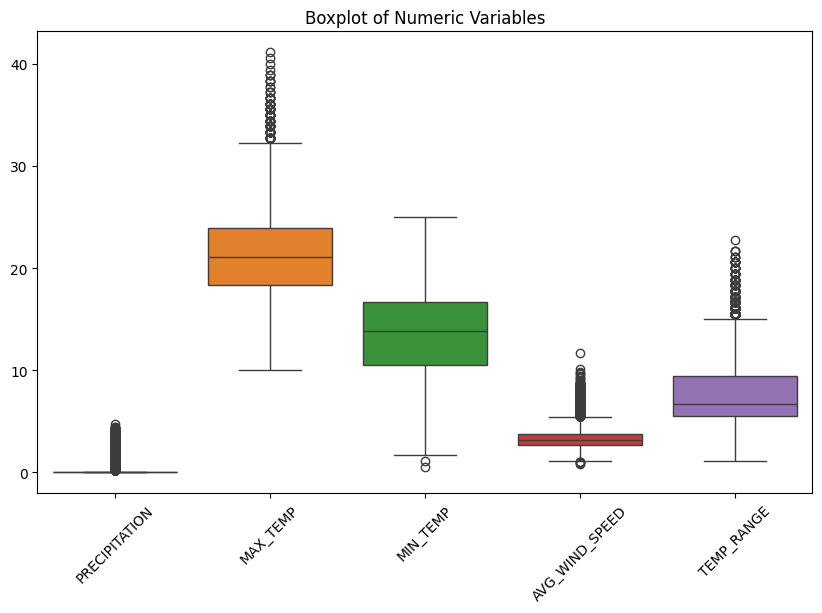

,PRECIPITATION,MAX_TEMP,MIN_TEMP,AVG_WIND_SPEED,TEMP_RANGE
count,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000
mean,0.155962,21.411629,13.610926,3.323786,7.800703
std,0.589916,4.034438,3.758919,0.952188,3.331182
min,0.000000,10.000000,0.555556,0.800202,1.111111
25%,0.000000,18.333333,10.555556,2.700122,5.555556
50%,0.000000,21.111111,13.888889,3.200806,6.666667
75%,0.000000,23.888889,16.666667,3.799840,9.444444
max,4.754125,41.111111,25.000000,11.699037,22.777778


In [ ]:
# 박스플롯
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_numeric)
plt.title('Boxplot of Numeric Variables')
plt.xticks(rotation=45)

plt.savefig('dataset2_outlier_boxplot.pdf', format='pdf')
plt.show()

df_numeric.describe()

In [ ]:
import numpy as np

df_numeric['PRECIPITATION'] = np.log1p(df_numeric['PRECIPITATION'])
df_numeric.describe()

,PRECIPITATION,MAX_TEMP,MIN_TEMP,AVG_WIND_SPEED,TEMP_RANGE
count,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000
mean,0.155962,21.411629,13.610926,3.323786,7.800703
std,0.589916,4.034438,3.758919,0.952188,3.331182
min,0.000000,10.000000,0.555556,0.800202,1.111111
25%,0.000000,18.333333,10.555556,2.700122,5.555556
50%,0.000000,21.111111,13.888889,3.200806,6.666667
75%,0.000000,23.888889,16.666667,3.799840,9.444444
max,4.754125,41.111111,25.000000,11.699037,22.777778


In [ ]:
# 모든 변수에 대해 이상치 처리 안 하는 것이 적절함

In [ ]:
# 트레인 셋, 테스트셋 분리
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터 불러오기
df = pd.read_csv("Data2_pre-2.csv")

# 데이터 섞고 train/test 나누기 (8:2 비율)
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,  # 재현 가능하도록 고정
    shuffle=True
)

# 결과 확인
print(f"전체 샘플 수: {len(df)}")
print(f"학습셋 크기: {len(train_df)}")
print(f"테스트셋 크기: {len(test_df)}")

전체 샘플 수: 14976
학습셋 크기: 11980
테스트셋 크기: 2996


In [ ]:
train_df.to_csv("Data2_train.csv", index=False)
test_df.to_csv("Data2_test.csv", index=False)